# Modelling Heart Disease Presence From Blood Pressure and Cholesterol

## INTRODUCTION
Heart disease is a condition that negatively affects the heart and overall health of an individual, making it important to provide an early diagnosis to ensure the use of more effective treatments (Mayo Clinic Staff, 2022). There are many risk factors for heart disease, two of the greatest being high blood pressure and high cholesterol (CDC, 2023). As such, it would be beneficial to create a model to predict the diagnosis of heart disease with these variables. 

This project will address the question: “Can resting blood pressure and cholesterol be used to predict the presence of heart disease, and is this model valid for predicting heart disease?”. In order to answer this question, the Heart Failure Prediction Data Set found on Kaggle, originally from UC Irvine Machine Learning Repository, will be used. Relevant columns to be used include the RestingBP column (numerical data describing resting blood pressure in mmHg), Cholesterol column (numerical data describing serum cholesterol in mm/dl) and HeartDisease column (categorical data describing heart disease present as 1 or heart disease absent as 0) columns.

## PRELIMINARY EXPLORATORY DATA ANALYSIS

The necessary libraries must be loaded in, and dataset read from the web into R.


In [11]:
library(tidyverse)
library(repr)

In [6]:
heart_data_url <- "https://raw.githubusercontent.com/crwoo/toy_ds_project/main/heart_data.csv?token=GHSAT0AAAAAACN4O25BWYZOF3X7RUXOPOAKZPKKQMQ"
heart_data <- read_csv(heart_data_url)
heart_data

Rows: 918 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
dbl (7): Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1


Data will be cleaned and wrangled to include only the necessary columns. The Cholesterol column will be filtered to remove 0s (representing NA as it is biologically impossible to have 0 cholesterol). The tibble displaying rows_removed shows the number of rows removed resulting from NAs (172). The dataset is then split into training and testing data.

In [12]:
rows_removed <- heart_data |>
                select(Cholesterol) |>
                filter(Cholesterol == 0) |>
                summarize(number_rows_removed = n())
rows_removed

cleaned_heart_data <- heart_data |>
                select(RestingBP, Cholesterol, HeartDisease) |>
                filter(Cholesterol != 0) |> # ask if this is correct to assume 0 is NA in this case
                mutate(HeartDisease = as_factor(HeartDisease)) |>
                mutate(HeartDisease = fct_recode(HeartDisease, "Normal (No Heart Disease)" = "0", "Heart Disease" = "1"))

heart_split <- initial_split(cleaned_heart_data, prop = 0.75, strata = HeartDisease)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split) 

heart_training

number_rows_removed
<int>
172


RestingBP,Cholesterol,HeartDisease
<dbl>,<dbl>,<fct>
160,180,Heart Disease
138,214,Heart Disease
140,207,Heart Disease
140,234,Heart Disease
110,196,Heart Disease
100,248,Heart Disease
120,267,Heart Disease
145,518,Heart Disease
130,172,Heart Disease


Summary information of the training data is shown in the table below.

In [14]:
summary_table_heart_training <- heart_training |>
                            group_by(HeartDisease) |>
                            summarize(mean_resting_bp = mean(RestingBP),
                                      mean_cholesterol = mean(Cholesterol),
                                      count = n()) 
summary_table_heart_training

HeartDisease,mean_resting_bp,mean_cholesterol,count
<fct>,<dbl>,<dbl>,<int>
Normal (No Heart Disease),130.1438,240.1027,292
Heart Disease,135.4045,250.6404,267


A scatterplot showing the distribution of classes given the two predictors is shown below.

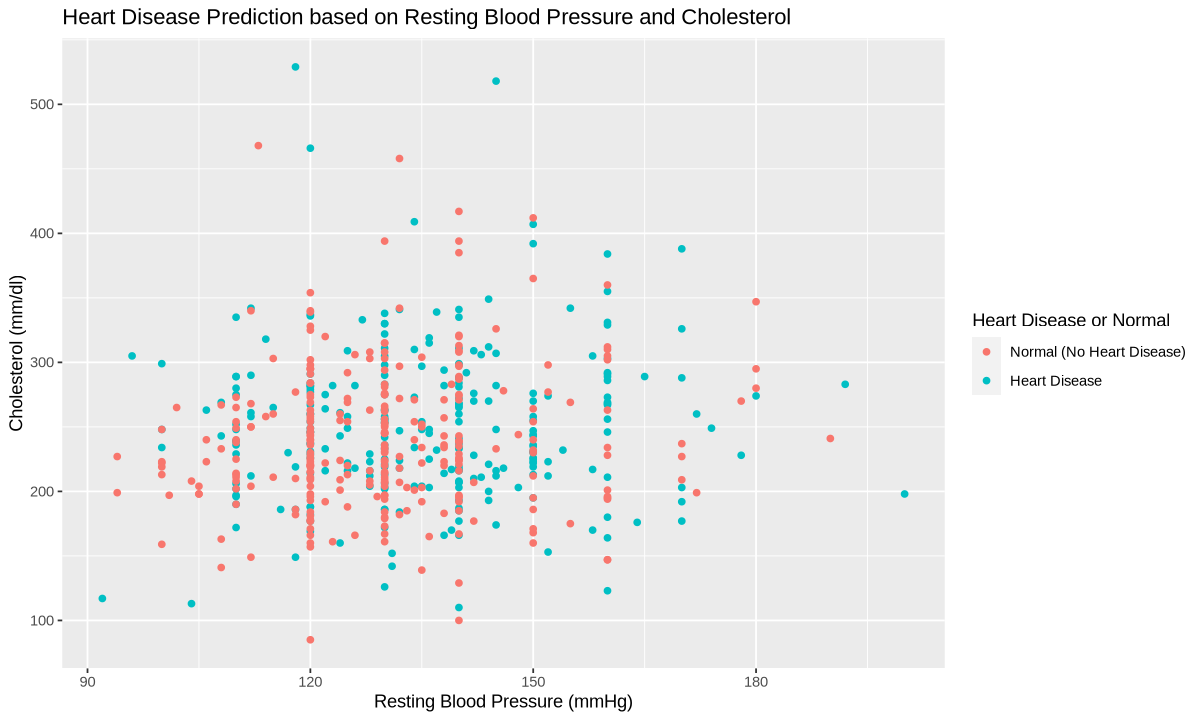

In [15]:
options(repr.plot.width = 10, repr.plot.height = 6)
scatterplot_heart_training <- heart_training |>
                            ggplot(aes(x = RestingBP, y = Cholesterol, color = HeartDisease)) +
                            geom_point() +
                            labs(x = "Resting Blood Pressure (mmHg)",
                                 y = "Cholesterol (mm/dl)",
                                 color = "Heart Disease or Normal") +
                            ggtitle("Heart Disease Prediction based on Resting Blood Pressure and Cholesterol")
scatterplot_heart_training

## METHODS

Columns used will include RestingBP, Cholesterol and HeartDisease; data will be cleaned, wrangled and split into 75% training data, 25% testing data. The classifier will be trained following a K-Nearest Neighbors method (model specification, data standardization, model fitting). The K-NN Classifier will be tuned (5-fold cross-validation will be performed to evaluate it, parameter value with highest accuracy will be selected). The K-NN classifier will be retrained on the training dataset and the testing dataset will be evaluated. Accuracy, precision and recall will be displayed in a table, results will be visualized in a confusion matrix and a scatterplot will be drawn to visualize the relationship between variables.

## EXPECTED OUTCOMES AND SIGNIFICANCE

It is expected that blood pressure and cholesterol will effectively predict heart disease, and that more patients with greater standardized blood pressure and cholesterol will be classified as having heart disease. A positive relationship between blood pressure and cholesterol can be expected as well. These predictions are supported by research conducted by Lewington, Ueda et al., and others (Lewington, 2003, Ueda et al., 2018). 

The findings of this project are significant as they can contribute to earlier diagnosis of heart disease for many individuals. They then may be more motivated to change aspects of their lives to be healthier, since blood pressure and cholesterol levels are often lowered by opting for a healthier diet or lifestyle (Mayo Clinic Staff, 2022). Ultimately, findings from this project can lead to further questions including, but not limited to: What other risk factors may predict heart disease? What treatments should be used for high blood pressure and∕or cholesterol?

## BIBLIOGRAPHY

CDC. (2023, March 21). *Know Your Risk for Heart Disease*. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/risk_factors.htm 

Lewington, S. (2003). The importance of cholesterol, blood pressure and smoking for coronary heart disease. *European Heart Journal, 24*(19), 1703-1704. https://doi.org/10.1016/j.ehj.2003.08.003

Mayo Clinic Staff. (2022, August 25). *Heart Disease*. MayoClinic. https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118

Ueda, P., Gulayin, P., & Danaei, G. (2018). Long-term moderately elevated LDL-cholesterol and blood pressure and risk of coronary heart disease. *PLoS ONE, 13*(7): e0200017. https://doi.org/10.1371/journal.pone.0200017 
